In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
import urllib.request
from pylab import rcParams

In [64]:
rcParams['figure.figsize'] = 9, 8

data_train = pd.read_csv("./poker_t.csv", header=None,
                       names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])
data_test = pd.read_csv("poker_tra_in.csv", header=None,
                        names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])
# data_train=pd.DataFrame(data_train)
'''
EXPLORE THE DATA
'''
# summary statistics including counts, mean, stdev, quartiles for the training dataset
# data_train.head(n=5)
# data_train.dtypes # data types of each variable
data_train["CLASS"]=data_train["CLASS"].astype(int)
data_train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [3]:
# subset clustering variables
cluster=data_train[['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5']]

clustervar=cluster.copy()
clustervar['S1']=preprocessing.scale(clustervar['S1'].astype('float64'))
clustervar['C1']=preprocessing.scale(clustervar['C1'].astype('float64'))
clustervar['S2']=preprocessing.scale(clustervar['S2'].astype('float64'))
clustervar['C2']=preprocessing.scale(clustervar['C2'].astype('float64'))
clustervar['S3']=preprocessing.scale(clustervar['S3'].astype('float64'))
clustervar['C3']=preprocessing.scale(clustervar['C3'].astype('float64'))
clustervar['S4']=preprocessing.scale(clustervar['S4'].astype('float64'))
clustervar['C4']=preprocessing.scale(clustervar['C4'].astype('float64'))
clustervar['S5']=preprocessing.scale(clustervar['S5'].astype('float64'))
clustervar['C5']=preprocessing.scale(clustervar['C5'].astype('float64'))

clus_train = clustervar
clus_train

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,-1.351374,0.801327,-1.335171,1.058113,-1.344673,1.598400,-1.340448,1.349730,-1.338435,-1.593673
1,-0.455687,1.068012,-0.443702,1.589054,-0.454300,0.797310,-0.444380,1.349730,-0.444549,-1.593673
2,0.440001,1.334698,0.447766,1.058113,0.436073,1.598400,0.451689,0.815980,0.449338,-1.593673
3,1.335688,0.801327,1.339234,1.058113,1.326445,-1.605959,1.347757,1.616605,1.343225,1.346321
4,1.335688,-1.598846,1.339234,1.589054,1.326445,1.331370,1.347757,1.082855,1.343225,0.811777
...,...,...,...,...,...,...,...,...,...,...
25005,0.440001,0.534641,-0.443702,-0.269239,1.326445,1.064340,1.347757,1.349730,-0.444549,-0.791857
25006,1.335688,-1.598846,1.339234,0.792643,0.436073,1.598400,0.451689,-0.785270,-1.338435,0.811777
25007,-0.455687,-1.598846,-0.443702,0.792643,1.326445,-0.804869,1.347757,-1.585895,1.343225,1.613593
25008,-0.455687,1.334698,1.339234,-1.065650,-1.344673,0.797310,-1.340448,1.349730,1.343225,0.544504


C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

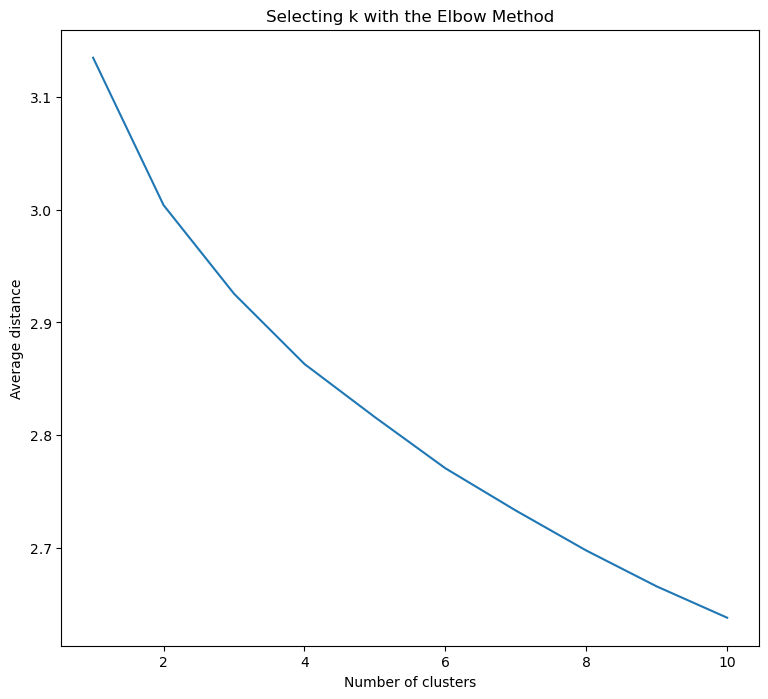

In [4]:
from scipy.spatial.distance import cdist
clusters=range(1,11)
meandist=[]


for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))
    / clus_train.shape[0])


plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 

In [5]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
ms = MeanShift()
ms.fit(clus_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(clus_train)):
    plt.plot(clus_train[i][0], clus_train[i][1], colors[labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
    marker=".",color='k', s=20, linewidths = 5, zorder=10)
plt.show()

KeyboardInterrupt: 

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 1 ... 1 0 1]
[1 1 1 ... 1 1 1]
[9 9 9 ... 1 1 1]
0.42379048380647744


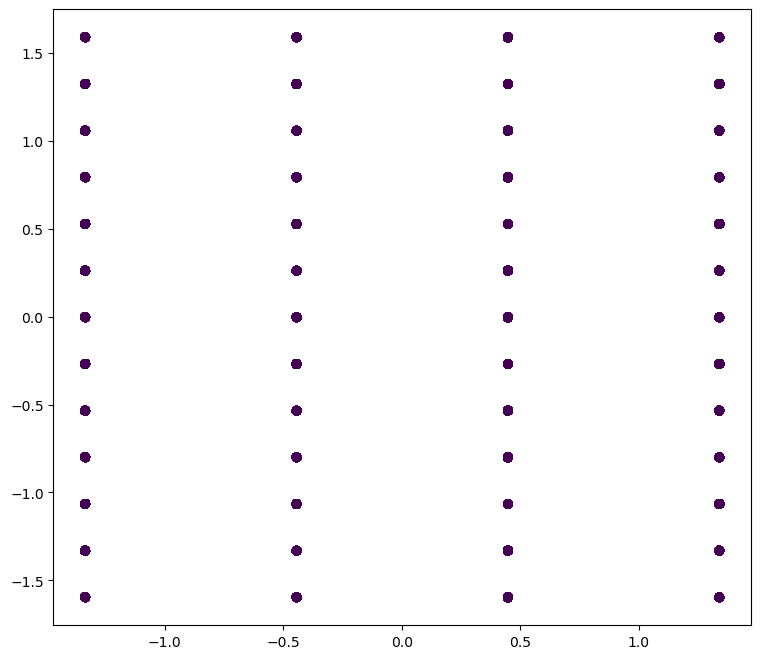

             S1        C1        S2        C2        S3        C3        S4  \
2      0.440001  1.334698  0.447766  1.058113  0.436073  1.598400  0.451689   
3      1.335688  0.801327  1.339234  1.058113  1.326445 -1.605959  1.347757   
4      1.335688 -1.598846  1.339234  1.589054  1.326445  1.331370  1.347757   
8      0.440001 -0.532103  0.447766 -0.269239  0.436073  0.530280  0.451689   
9      1.335688 -1.598846  1.339234 -0.800179  1.326445 -1.338929  1.347757   
...         ...       ...       ...       ...       ...       ...       ...   
25004  0.440001 -0.532103  0.447766 -0.003768  1.326445  1.064340  0.451689   
25005  0.440001  0.534641 -0.443702 -0.269239  1.326445  1.064340  1.347757   
25006  1.335688 -1.598846  1.339234  0.792643  0.436073  1.598400  0.451689   
25007 -0.455687 -1.598846 -0.443702  0.792643  1.326445 -0.804869  1.347757   
25009 -1.351374  0.001269  0.447766  1.058113  0.436073 -1.071899  1.347757   

             C4        S5        C5  cluster  
2   

In [6]:
from sklearn import metrics
import time
final_dict={}
start_time = time.time()
model3=KMeans(n_clusters=2)
model3.fit(clus_train)
pred=model3.predict(clus_train)
print(pred)
pred[pred == 0] =1
# print()
print(pred)
print(data_train["CLASS"].values)
score = metrics.accuracy_score(data_train["CLASS"].values,pred)
# print(model3.labels_)
print(score)
final_dict["Non-distributed"]=score
plt.scatter(clus_train["S2"],clus_train["C2"], c=pred)
plt.show()
# center = np.array(model3.cluster_centers_)
# print(center)
# model3[model3.labels_==1]
# cluster_map['data_index'] = data_train.index.values
cluster_map = clus_train
cluster_map['cluster'] = model3.labels_
clust_one=cluster_map[cluster_map.cluster == 1]
# cluster_map.head()
print(clust_one)
center = np.array(model3.cluster_centers_)
# print(center)
print("TIME",time.time() - start_time)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6373276776246023


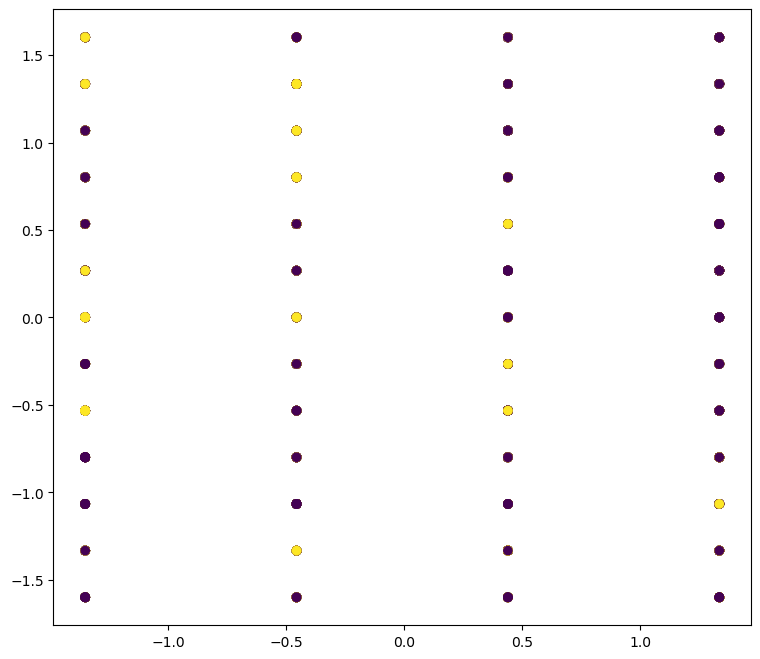

TIME 1.506317377090454


In [7]:
## 0.7C1 + 0.3C2
import time
start_time = time.time()
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.30,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["7C1+3C2"]=score
print(score)
plt.scatter(X_test["S1"],X_test["C1"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6237927508237701
TIME 1.088942289352417


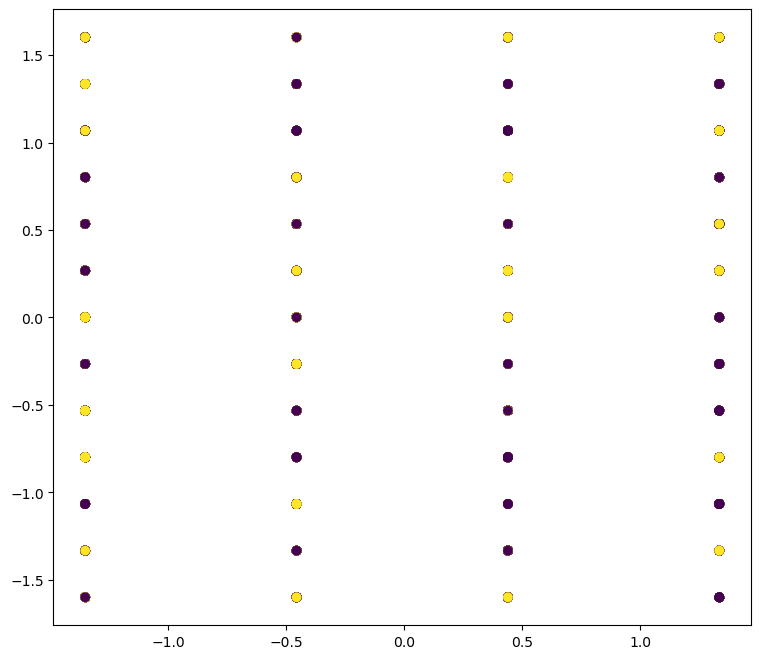

In [8]:

from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.70,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["3C1+7C2"]=score
print(score)
plt.scatter(X_test["S1"],X_test["C1"], c=pred)

print("TIME",time.time() - start_time)
plt.show()

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6167674196627426


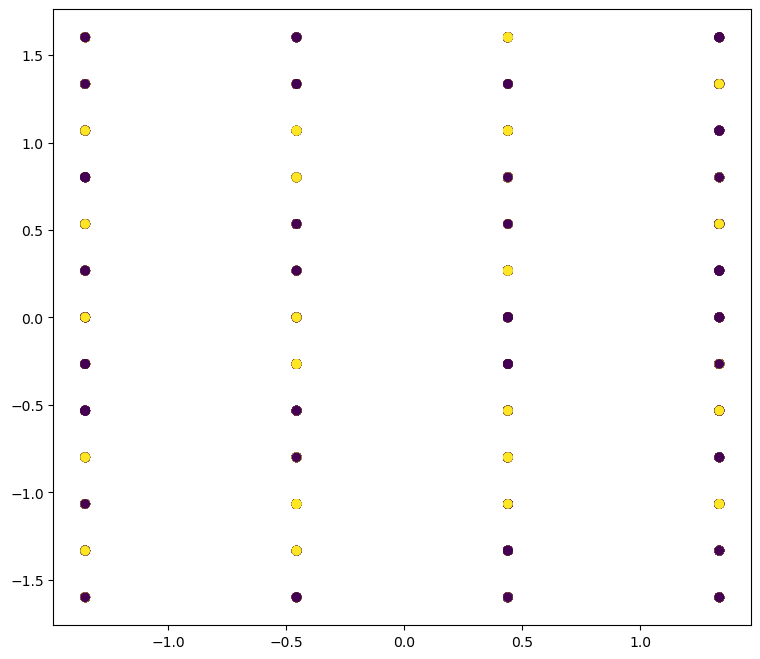

TIME 1.8757421970367432


In [9]:
## 0.5C1 + 0.5C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.50,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["5C1+5C2"]=score
print(score)
plt.scatter(X_test["S1"],X_test["C1"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

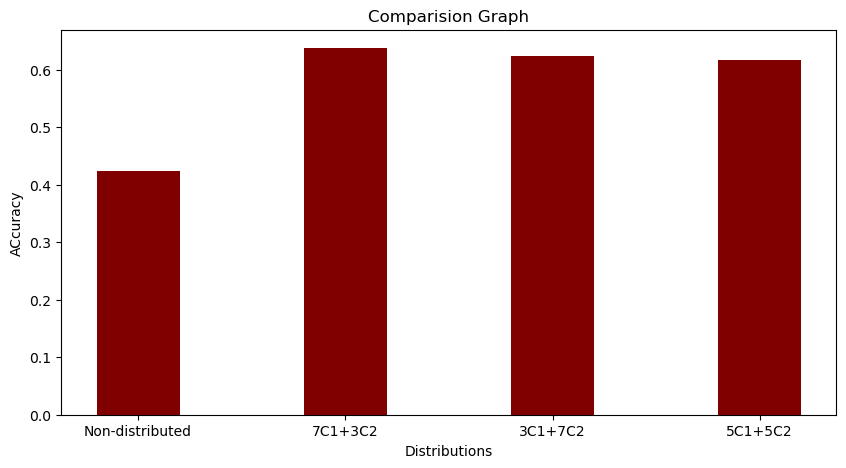

In [10]:

import numpy as np
import matplotlib.pyplot as plt
courses = list(final_dict.keys())
values = list(final_dict.values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Distributions")
plt.ylabel("ACcuracy")
plt.title("Comparision Graph")
plt.show()

Text(0.5, 1.0, 'Scatterplot of Canonical Variables for 2 Clusters')

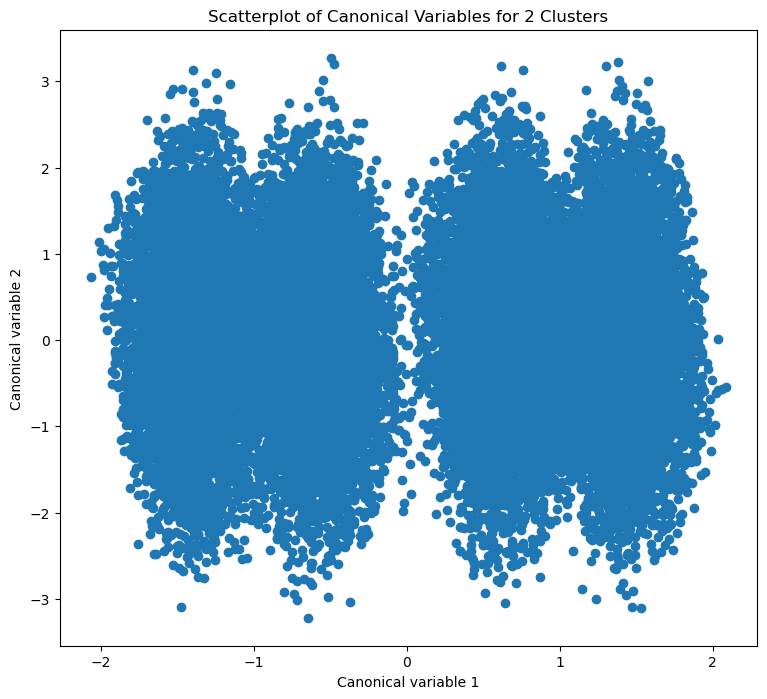

In [11]:
from sklearn.decomposition import PCA # CA from PCA function
pca_2 = PCA(2) # return 2 first canonical variables
plot_columns = pca_2.fit_transform(clus_train) # fit CA to the train dataset
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1],) # plot 1st canonical variable on x axis, 2nd on y-axis
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')

In [22]:


"""
Dr ;;
2: for each site s 2 f1; ... ; Sg do
3: Apply DML to data at site s;
4: Let Y ðsÞ
i ; i ¼ 1; 2; ... ; ns be the group centroids;
5: Let WðsÞ
i ; i ¼ 1; 2; ... ; ns be the group sizes;
6: Ys fY ðsÞ
i : i ¼
"""

from sklearn.cluster import SpectralClustering
sc=SpectralClustering(n_clusters=4,assign_labels='discretize',random_state=10).fit(center)
sc.labels_

C:\Users\sumuk\anaconda3\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


array([0, 2, 1], dtype=int64)

In [24]:

data_train = pd.read_csv("poker_t.csv")
print(data_train.head())
data_train=data_train.dropna()
without_center=data_train.drop("10",axis=1)
without_center=without_center.dropna()
print(without_center.head())
without_center.shape

   1  10  1.1  11  1.2  13  1.3  12  1.4  1.5  9
0  2  11    2  13    2  10    2  12    2    1  9
1  3  12    3  11    3  13    3  10    3    1  9
2  4  10    4  11    4   1    4  13    4   12  9
3  4   1    4  13    4  12    4  11    4   10  9
4  1   2    1   4    1   5    1   3    1    6  8
   1  1.1  11  1.2  13  1.3  12  1.4  1.5  9
0  2    2  13    2  10    2  12    2    1  9
1  3    3  11    3  13    3  10    3    1  9
2  4    4  11    4   1    4  13    4   12  9
3  4    4  13    4  12    4  11    4   10  9
4  1    1   4    1   5    1   3    1    6  8


(25009, 10)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 2 ... 2 1 2]
[11 12 10 ...  1 12  7]
0.07921148386580831


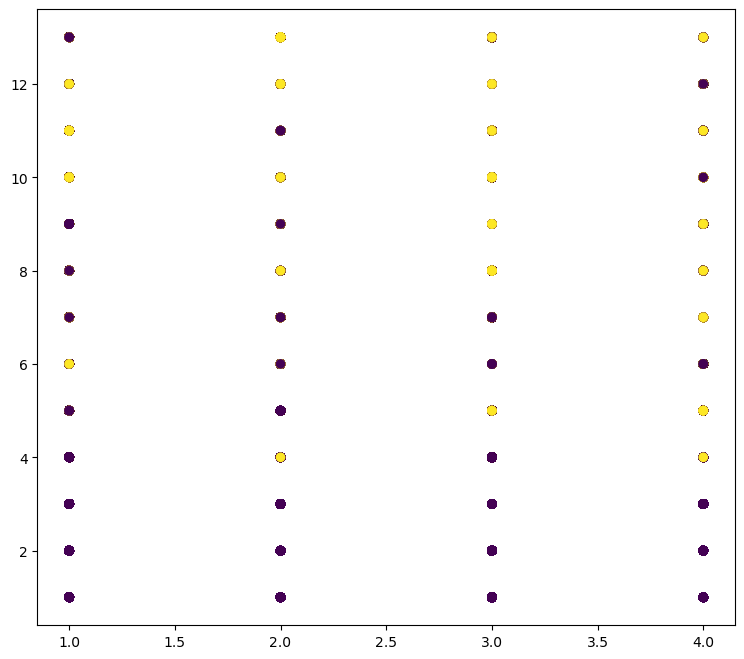

       1  1.1  11  1.2  13  1.3  12  1.4  1.5  9  cluster
4      1    1   4    1   5    1   3    1    6  8        1
6      2    2   2    2   3    2   4    2    5  8        1
7      3    3   6    3   9    3   7    3    8  8        1
8      4    4   4    4   2    4   3    4    5  8        1
9      1    2   1    3   9    1   5    2    3  1        1
...   ..  ...  ..  ...  ..  ...  ..  ...  ... ..      ...
24994  2    1   2    4   8    3   3    4    6  0        1
24995  2    1   5    1  10    4  10    2   13  1        1
24997  1    4   1    4  12    1  13    1   10  0        1
25000  2    3   5    3   8    4   1    4    2  0        1
25007  2    4   3    1  10    1  12    4    9  1        1

[9288 rows x 11 columns]
TIME 2.0270955562591553


In [25]:

## Non-distributed
from sklearn import metrics
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import time
final_dict={}
start_time = time.time()
model3=KMeans(n_clusters=3)
model3.fit(without_center)
pred=model3.predict(without_center)
# pred[pred == 1] =2
pred[pred == 0] =1
# print()
print(pred)
print(data_train["10"].values)
score = metrics.accuracy_score(data_train["10"],pred)
# print(model3.labels_)
final_dict["Non-distributed"]=score
print(score)
plt.scatter(without_center["1"],without_center["11"], c=pred)
plt.show()
center = np.array(model3.cluster_centers_)
# print(center)
cluster_map = without_center
# model3[model3.labels_==1]
# cluster_map['data_index'] = data_train.index.values
cluster_map['cluster'] = model3.labels_
clust_one=cluster_map[cluster_map.cluster == 1]
# cluster_map.head()
print(clust_one)
print("TIME",time.time() - start_time)

In [26]:
from sklearn.cluster import SpectralClustering
sc=SpectralClustering(n_clusters=4,assign_labels='discretize',random_state=10)
train=sc.fit(center)
train.labels_

C:\Users\sumuk\anaconda3\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


array([0, 1, 2], dtype=int64)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6993182633656261


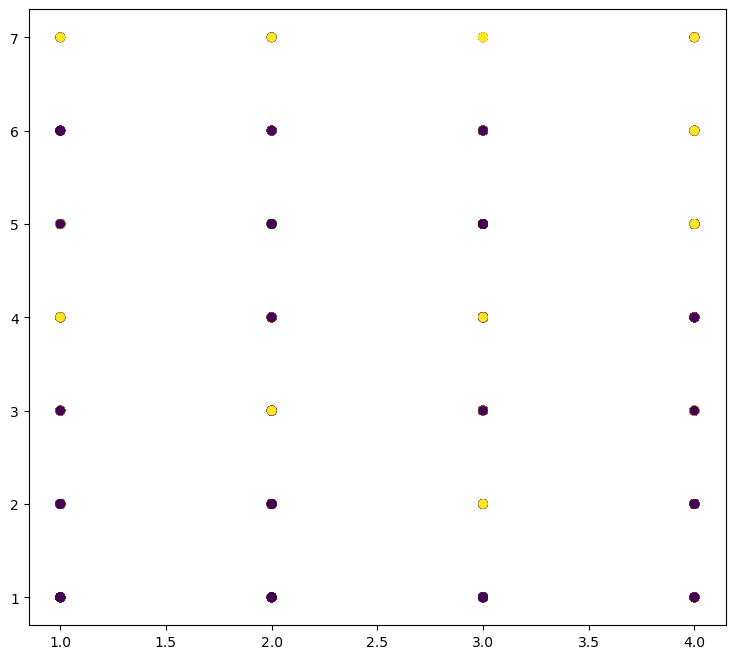

TIME 0.6143965721130371


In [28]:



## 0.7C1 + 0.3C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.30,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["7C1+3C2"]=score
print(score)
plt.scatter(X_test["1"],X_test["11"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


[1 0 0 ... 2 1 1]
0.683482005536758


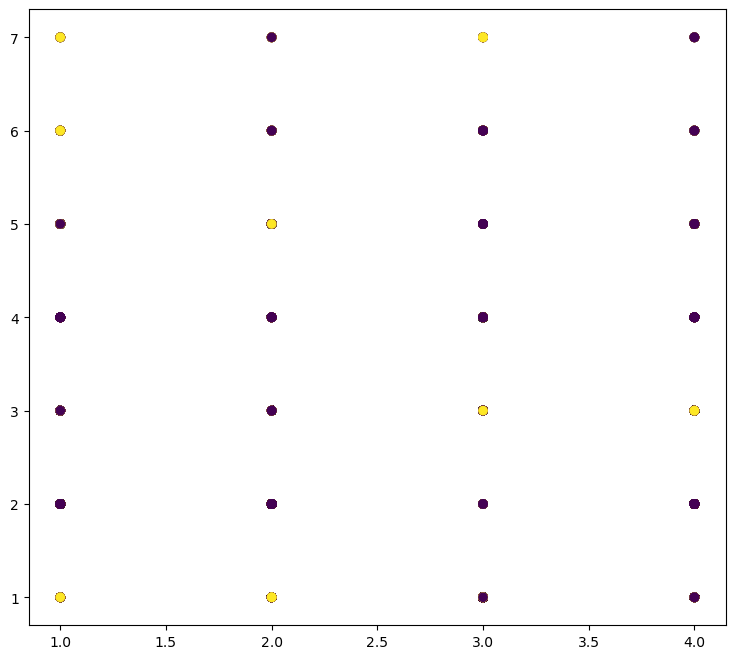

TIME 0.9368224143981934


In [29]:

# 0.3C1 + 0.7C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.70,random_state=70)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
print(pred)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
print(score)
final_dict["3C1+7C2"]=score
plt.scatter(X_test["1"],X_test["11"], c=pred)
plt.show()
import time
print("TIME",time.time() - start_time)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 1 0 ... 2 2 0]
0.679801894918174


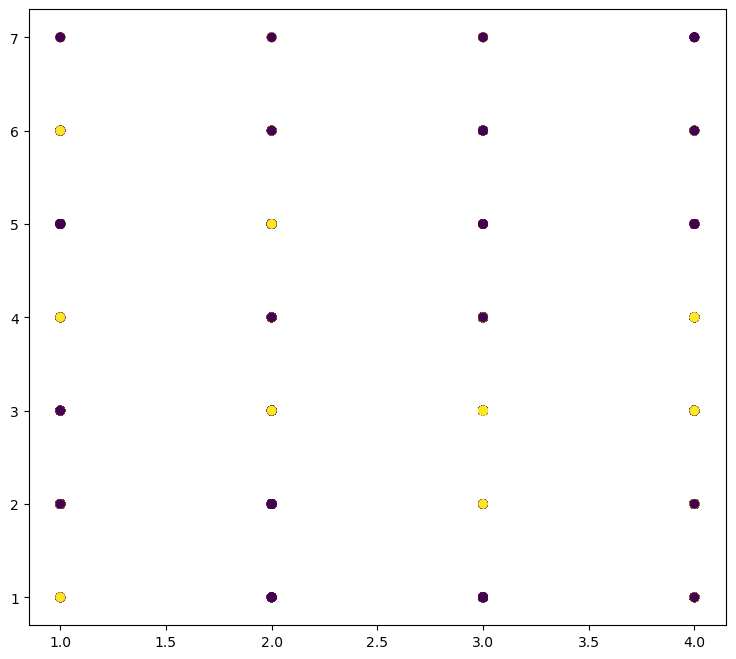

TIME 1.8331811428070068


In [30]:

# 0.5C1 + 0.5C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.50,random_state=10)
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
print(pred)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["5C1+5C2"]=score
print(score)
plt.scatter(X_test["1"],X_test["11"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

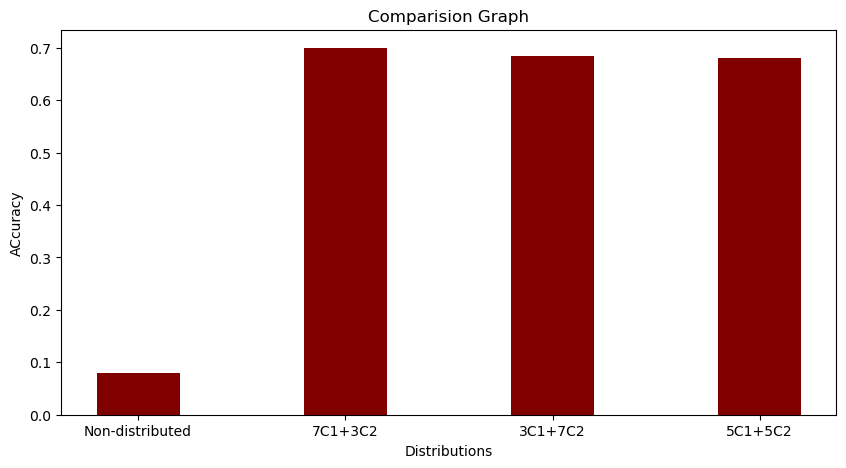

In [31]:


import numpy as np
import matplotlib.pyplot as plt
courses = list(final_dict.keys())
values = list(final_dict.values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Distributions")
plt.ylabel("ACcuracy")
plt.title("Comparision Graph")
plt.show()

In [57]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import time
final_dict={}
start_time = time.time()
data_train = pd.read_csv("poker_t.csv")
# data_train = pd.read_csv("SkinSegmentation (1).csv")
print(data_train.head())
labelencoder = LabelEncoder()
for feat in data_train.columns:
    data_train[feat] = labelencoder.fit_transform(data_train[feat].astype(str))
# data_train = labelencoder.fit_transform(data_train["s"])
data_train=data_train.dropna()
without_center=data_train.drop("13",axis=1)
without_center=without_center.dropna()
print(without_center.head())
without_center.shape
print("TIME",time.time() - start_time)

   1  10  1.1  11  1.2  13  1.3  12  1.4  1.5  9
0  2  11    2  13    2  10    2  12    2    1  9
1  3  12    3  11    3  13    3  10    3    1  9
2  4  10    4  11    4   1    4  13    4   12  9
3  4   1    4  13    4  12    4  11    4   10  9
4  1   2    1   4    1   5    1   3    1    6  8
   1  10  1.1  11  1.2  1.3  12  1.4  1.5  9
0  1   2    1   4    1    1   3    1    0  9
1  2   3    2   2    2    2   1    2    0  9
2  3   1    3   2    3    3   4    3    3  9
3  3   0    3   4    3    3   2    3    1  9
4  0   5    0   7    0    0   6    0    9  8
TIME 0.15931153297424316


C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[2 1 2 ... 2 3 2]
[ 5  9  4 ... 12 12  5]
0.07702953393150139


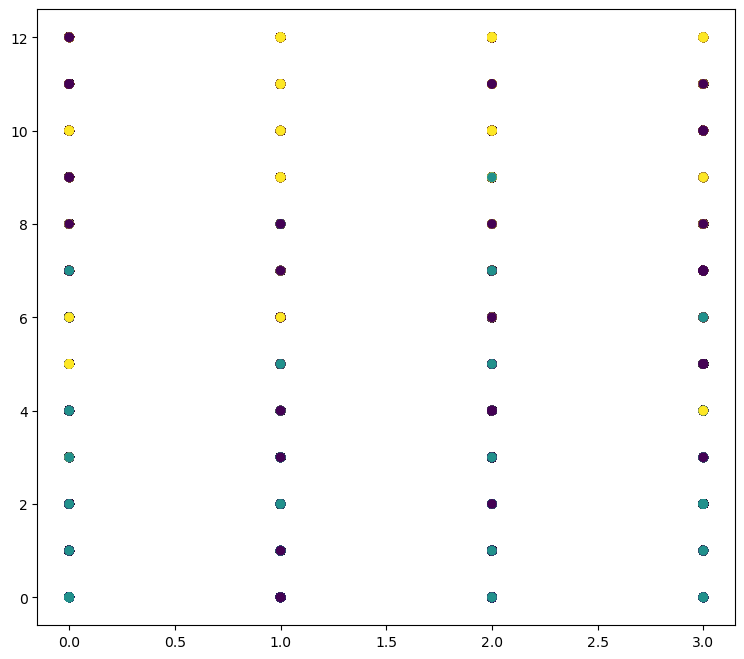

        1  1.1  1.2  2  4  2.1   3  1.3  12  0  cluster
9       3   10    2  0  4    0  12    1   9  0        1
15      3    5    3  1  3    1  10    2   1  1        1
17      1    6    2  1  0    1   9    3   1  0        1
18      0   10    1  3  0    1  12    2   4  0        1
26      1    8    2  1  3    2   6    1   2  0        1
...    ..  ...  ... .. ..  ...  ..  ...  .. ..      ...
541166  2   11    1  3  7    3  10    0   2  0        1
541175  3   11    0  3  4    1  11    1   2  1        1
541187  0   11    2  2  6    2  12    0   3  1        1
541191  1   11    2  1  3    2   5    2   0  1        1
541198  3    6    1  1  1    1   3    3   0  0        1

[136879 rows x 11 columns]
TIME 43.99148392677307


In [37]:

## Non-distributed
from sklearn import metrics
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import time
start_time = time.time()
model3=KMeans(n_clusters=4)
model3.fit(without_center)
pred=model3.predict(without_center)
# pred[pred == 1] =2
pred[pred == 0] =1
# print()
print(pred)
print(data_train["13"].values)
score = metrics.accuracy_score(data_train["13"],pred)
final_dict["Non-distributed"]=score
# print(model3.labels_)
print(score)
plt.scatter(without_center["2"],without_center["4"], c=pred)
plt.show()
center = np.array(model3.cluster_centers_)
# print(center)
cluster_map = without_center
# model3[model3.labels_==1]
# cluster_map['data_index'] = data_train.index.values
cluster_map['cluster'] = model3.labels_
clust_one=cluster_map[cluster_map.cluster == 1]
# cluster_map.head()
print(clust_one)
print("TIME",time.time() - start_time)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5484122345606858


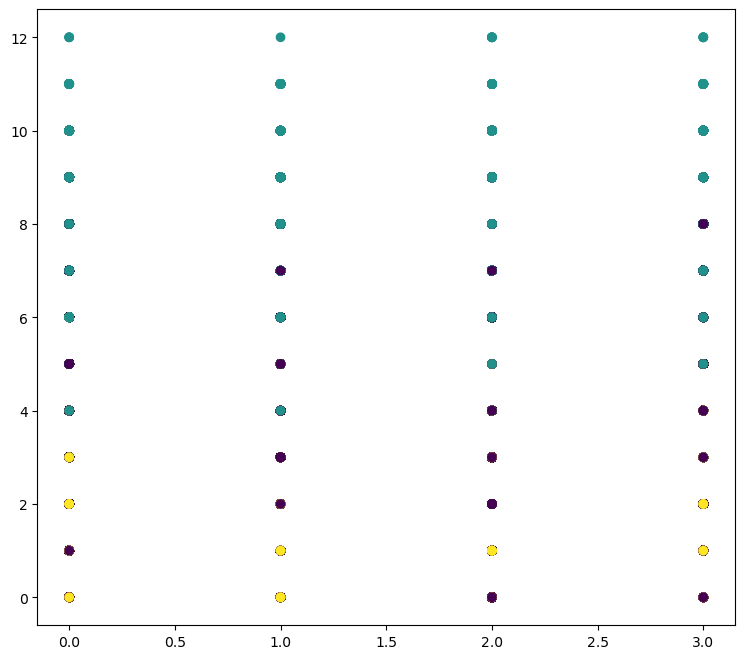

TIME 2.6152563095092773


In [39]:

## 0.3C1 + 0.7C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.30,random_state=70)
model3=KMeans(n_clusters=4)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["3C1+7C2"]=score
print(score)
plt.scatter(X_test["2"],X_test["4"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5850692994906905


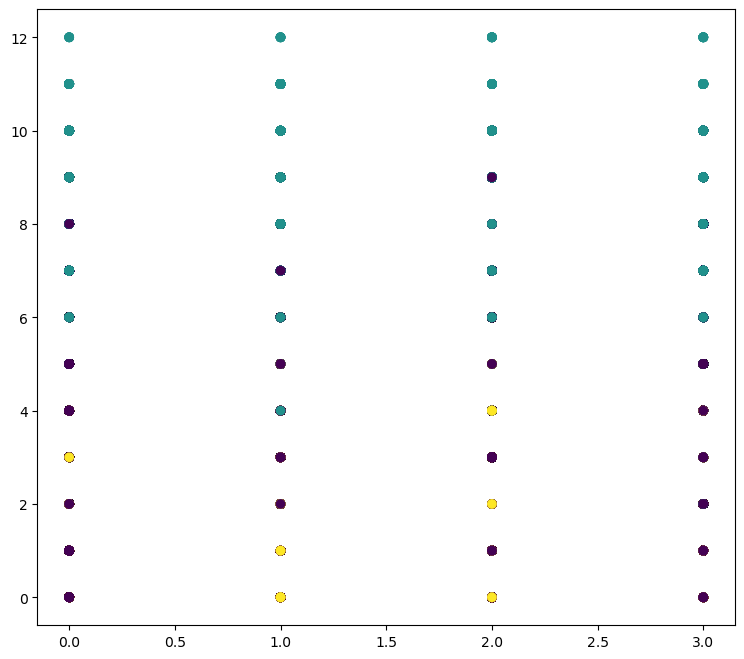

TIME 6.117519855499268


In [41]:

## 0.7C1 + 0.3C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.70,random_state=70)
model3=KMeans(n_clusters=4)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["7C1+3C2"]=score
print(score)
plt.scatter(X_test["2"],X_test["4"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4423874926943308


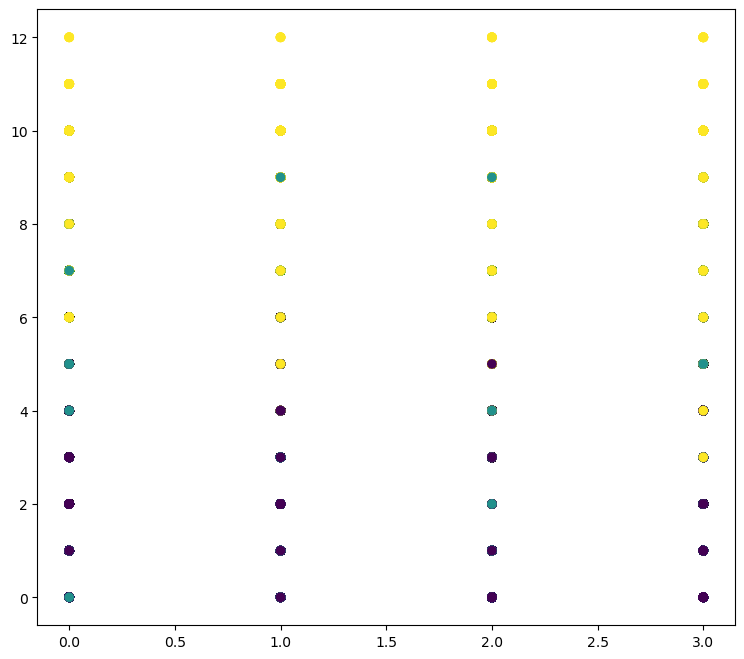

TIME 4.350401401519775


In [42]:
## 0.5C1 + 0.5C2
from sklearn.model_selection import train_test_split
import time
start_time = time.time()
X_train, X_test,y_train,y_test =  train_test_split(clust_one,clust_one["cluster"],test_size=0.50,random_state=70)
model3=KMeans(n_clusters=4)
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
# pred[pred == 1] =2
pred[pred == 0] =1
score = metrics.accuracy_score(y_test,pred)
final_dict["5C1+5C2"]=score
print(score)
plt.scatter(X_test["2"],X_test["4"], c=pred)
plt.show()
print("TIME",time.time() - start_time)

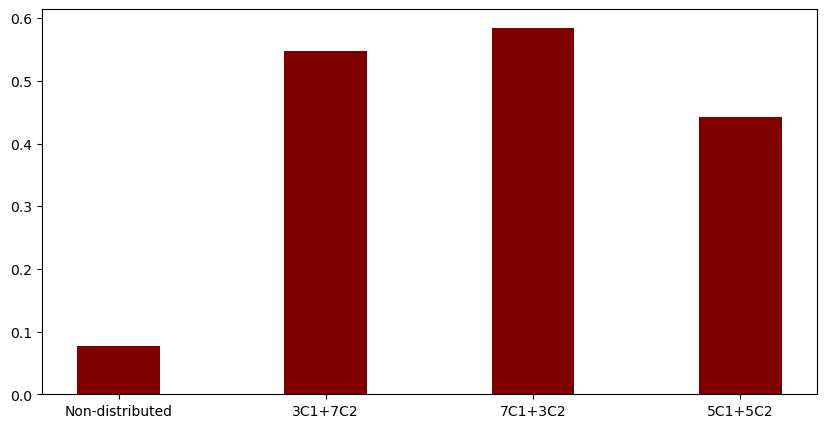

In [44]:


import numpy as np
import matplotlib.pyplot as plt

courses = list(final_dict.keys())
values = list(final_dict.values())
fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color ='maroon',
        width = 0.4)

plt.show()

In [45]:

from sklearn.cluster import SpectralClustering
sc=SpectralClustering(n_clusters=4,assign_labels='discretize',random_state=10)
train=sc.fit(center)
train.labels_

C:\Users\sumuk\anaconda3\Lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


array([1, 0, 2, 3], dtype=int64)

In [54]:




cluslist=list(clus_train['index'])
# create a list of cluster assignments
labels=list(model3.labels_)
# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist
# convert newlist dictionary to a dataframe
newclus=DataFrame.from_dict(newlist, orient='index')
newclus
# rename the cluster assignment column
newclus.columns = ['12']

# now do the same for the cluster assignment variable create a unique identifier variable from the index for the
# cluster assignment dataframe to merge with cluster training data
newclus.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
# cluster frequencies
merged_train.cluster.value_counts()

1    12572
0    12438
Name: cluster, dtype: int64

In [55]:

clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
              level_0         index        S1        C1        S2        C2  \
cluster                                                                       
0        12588.264190  12588.264190  0.017793  0.000261  0.025325  0.002400   
1        12421.628619  12421.628619 -0.017604 -0.000258 -0.025056 -0.002375   

               S3        C3        S4        C4        S5        C5        12  
cluster                                                                        
0       -0.900274 -0.016081  0.013020 -0.005822  0.029201  0.008262  1.548078  
1        0.890678  0.015910 -0.012881  0.005760 -0.028890 -0.008174  1.550111  


In [65]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(data_train, data_train["CLASS"])
prediction = model.predict(data_test)
val=model.apply(data_test)
print(val)

[[ 301    2    2 ...    3  498    1]
 [ 303    5  410 ...    5 1580    3]
 [ 303  254  410 ...  449  805    3]
 ...
 [  70    5   62 ...    5  155    3]
 [ 303  239  330 ...  449 1849    3]
 [ 301  333    2 ...    3 1575    1]]


In [66]:
pokerhand_train=data_train['CLASS']
pokerhand_test=data_test['CLASS']
# put into a pandas dataFrame
pokerhand_train=pd.DataFrame(pokerhand_train)
pokerhand_test=pd.DataFrame(pokerhand_test)
pokerhand_train.reset_index(level=0, inplace=True) # reset index
merged_train_all=pd.merge(pokerhand_train, merged_train, on='index') # merge the pokerhand train with merged clusters
sub1 = merged_train_all[['CLASS', 'cluster']].dropna()

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

# respone formula
pokermod = smf.ols(formula='CLASS ~ cluster', data=sub1).fit()
print (pokermod.summary())

print ('means for Poker hands by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

print ('standard deviations for Poker hands by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

mc1 = multi.MultiComparison(sub1['CLASS'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                  CLASS   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1724
Date:                Sun, 17 Mar 2024   Prob (F-statistic):              0.678
Time:                        17:55:06   Log-Likelihood:                -29540.
No. Observations:               25010   AIC:                         5.908e+04
Df Residuals:                   25008   BIC:                         5.910e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6191      0.007     87.576      0.0

In [70]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OutputCodeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
#-----------------------
array_train = data_train.values
data_train = array_train[:,0:10]
label_train = array_train[:,10]
#Ready the Test Data
array_test = data_test.values
data_test = array_test[:,0:10]
label_test = array_test[:,10]
#----------------------------------------------------------------
# Scaling the Data for our Main Model
#----------------------------------------------------------------
# Scale the Data to Make the NN easier to converge
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(data_train)  
# Transform the training and testing data
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
#----------------------------------------------------------------
#Apply the MLPClassifier:
#----------------------------------------------------------------
acc_array = [0] * 5
for s in range (1,6):
    #Init MLPClassifier
    clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(64,64),
                        activation='tanh', learning_rate_init=0.02,max_iter=2000,random_state=s)
    #Fit the Model
    result = clf.fit(data_train, label_train)
    #Predict
    prediction = clf.predict(data_test)
    #Get Accuracy
    acc = accuracy_score(label_test, prediction)
    #Store in the Array
    acc_array[s-1] = acc
#----------------------------------------------------------------
#Fetch & Print the Results:
#----------------------------------------------------------------
print(classification_report(label_test,prediction))
print("Accuracy using MLPClassifier and Random Seed:",s,":",str(acc)) 
print(confusion_matrix(label_test, prediction))
print("Mean Accuracy using MLPClassifier Classifier: ",np.array(acc_array).mean())
#----------------------------------------------------------------
# Init the Models for Comparision
#----------------------------------------------------------------
models = [RandomForestClassifier(), 
          KNeighborsClassifier(),tree.DecisionTreeClassifier()]

model_names = ["Random Forest","KNN","Decision Tree"]
#----------------------------------------------------------------
# Run Each Model
#----------------------------------------------------------------
for model,name in zip(models,model_names):
    model.fit(data_train, label_train)
    # Display the relative importance of each attribute
    if name == "Random Forest":
        print(model.feature_importances_)   
    #Predict
    prediction = model.predict(data_test)
    # Print Accuracy
    acc = accuracy_score(label_test, prediction)
    print("Accuracy Using",name,": " + str(acc)+'\n')
    print(classification_report(label_test,prediction))
    print(confusion_matrix(label_test, prediction))
     

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99    271089
           1       0.99      0.99      0.99    228837
           2       0.94      0.98      0.96     25819
           3       0.96      0.97      0.97     11365
           4       0.44      0.32      0.37      2105
           5       0.62      0.07      0.12      1098
           6       0.95      0.84      0.89       774
           7       0.86      0.33      0.47       113
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2

    accuracy                           0.98    541209
   macro avg       0.67      0.55      0.58    541209
weighted avg       0.98      0.98      0.98    541209

Accuracy using MLPClassifier and Random Seed: 5 : 0.9848838433950655
[[268105   2085      0      0    854     44      0      0      0      1]
 [   233 227176   1406      4     17      1      0      0      0      0]
 [     0    345  25225    

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.64      0.81      0.71    271089
           1       0.58      0.49      0.53    228837
           2       0.40      0.00      0.01     25819
           3       0.47      0.00      0.00     11365
           4       0.11      0.00      0.00      2105
           5       1.00      0.00      0.01      1098
           6       0.00      0.00      0.00       774
           7       0.00      0.00      0.00       113
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2

    accuracy                           0.61    541209
   macro avg       0.32      0.13      0.13    541209
weighted avg       0.59      0.61      0.58    541209

[[219119  51961      7      0      1      0      0      0      0      1]
 [115562 113135    115     18      7      0      0      0      0      0]
 [  6531  19182     99      7      0      0      0      0      0      0]
 [  1996   9324     17

C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sumuk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      0.66      0.60    271089
           1       0.46      0.43      0.44    228837
           2       0.16      0.01      0.02     25819
           3       0.10      0.01      0.01     11365
           4       0.05      0.00      0.00      2105
           5       0.53      0.02      0.04      1098
           6       0.00      0.00      0.00       774
           7       0.00      0.00      0.00       113
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2

    accuracy                           0.51    541209
   macro avg       0.18      0.11      0.11    541209
weighted avg       0.48      0.51      0.49    541209

[[179331  91182    455    100     10     11      0      0      0      0]
 [129910  97482   1076    322     39      8      0      0      0      0]
 [ 12922  12453    329     99     16      0      0      0      0      0]
 [  4591   6545    165